In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
# Specify path to merged dataset
merged_dataset = "data/merged_school_zhi_value.csv"

# Load merged dataset into dataframe
merged_df = pd.read_csv(merged_dataset)
merged_df = merged_df.drop(columns="Unnamed: 0")

In [3]:
mean_achievement = merged_df.groupby('Zip Code')['Social Studies Achievement'].mean()
median_achievement = merged_df.groupby('Zip Code')['Social Studies Achievement'].median()

In [4]:
# create housing price columns
price_columns = ['2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']
house_average = merged_df.groupby('Zip Code')[price_columns].mean()
house_average.head()

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
Zip Code,,,,,,,,,,,,
32003,287864.0,287766.0,287816.0,288849.0,289554.0,290068.0,290329.0,290981.0,292019.0,292803.0,293059.0,293166.0
32008,130079.0,130273.0,130633.0,130933.0,131064.0,131191.0,131345.0,131640.0,131924.0,132222.0,132771.0,133492.0
32009,228914.0,230476.0,232130.0,232619.0,232508.0,232745.0,233207.0,234489.0,235675.0,236848.0,238924.0,241314.0
32011,218095.0,219669.0,221436.0,222726.0,223482.0,224304.0,224966.0,226245.0,228225.0,229770.0,231735.0,233539.0
32024,179343.0,180372.0,181620.0,182774.0,182979.0,183132.0,183388.0,183575.0,183609.0,183580.0,183498.0,183302.0


In [5]:
# add mean and price to house_average dataframe
house_average["2019 House Mean"] = house_average[price_columns].median(axis=1)
house_average["2019 Dec House Price"] = house_average[price_columns].mean(axis=1)

In [6]:
# merge house_average with mean_achievement
clean_merged_df = pd.merge( house_average, mean_achievement, on="Zip Code" )
clean_merged_df = clean_merged_df.rename(columns={"Social Studies Achievement":"Social Studies Mean"})
clean_merged_df = clean_merged_df[['2019 House Mean','2019 Dec House Price','Social Studies Mean']]
clean_merged_df.head()


,2019 House Mean,2019 Dec House Price,Social Studies Mean
Zip Code,,,
32003,290198.5,290356.166667,95.5
32008,131268.0,131463.916667,64.0
32009,232976.0,234154.083333,NaN
32011,224635.0,225349.333333,75.5
32024,183217.0,182597.666667,96.0


In [7]:
# merge that with median achievement
clean_merged_df = pd.merge( clean_merged_df,median_achievement, on="Zip Code" )
clean_merged_df = clean_merged_df.rename(columns={"Social Studies Achievement":"Social Studies Median"})
clean_merged_df.head()

,2019 House Mean,2019 Dec House Price,Social Studies Mean,Social Studies Median
Zip Code,,,,
32003,290198.5,290356.166667,95.5,95.5
32008,131268.0,131463.916667,64.0,64.0
32009,232976.0,234154.083333,NaN,NaN
32011,224635.0,225349.333333,75.5,75.5
32024,183217.0,182597.666667,96.0,96.0


In [8]:
# drop null values
clean_merged_df = clean_merged_df.dropna()

# Output result of dataframe into a csv file
clean_merged_df.to_csv("data/social_studies_versus_home_prices.csv")

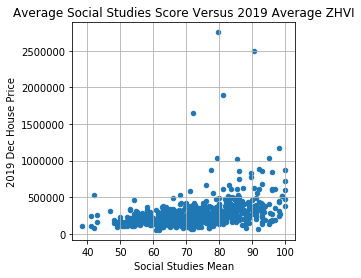

In [10]:
# Select columns
plot_data_df = clean_merged_df.loc[:, ["Zip Code", "2019 Dec House Price", "Social Studies Mean"]]

# Set index
plot_data_df = plot_data_df.set_index('Zip Code')

# Plot on scatter
plot_data_df.plot(kind="scatter", y="2019 Dec House Price", x="Social Studies Mean", grid=True, figsize=(4,4), title="Average Social Studies Score Versus 2019 Average ZHVI")
plt.show()

In [11]:
zhvi_2019 = plot_data_df.iloc[:,0]
avg_score = plot_data_df.iloc[:,1]
correlation = sts.pearsonr(zhvi_2019,avg_score)


The linear regression equation is y = 6119.94x + -171941.57
The correlation is equal to 0.34


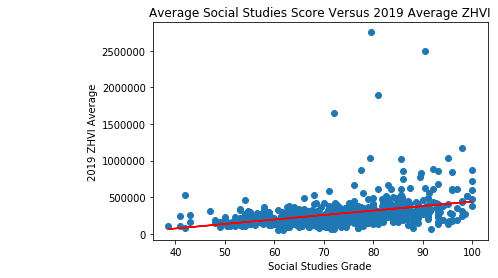

In [12]:
# Plot the correlation
x_values = plot_data_df["Social Studies Mean"]
y_values = plot_data_df["2019 Dec House Price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Social Studies Grade")
plt.ylabel("2019 ZHVI Average")
plt.title("Average Social Studies Score Versus 2019 Average ZHVI")

print(f"The linear regression equation is {line_eq}")
print(f"The correlation is equal to {round(correlation[0],2)}")

In [13]:
plt.show()

In [ ]:
plt.savefig('mytable.png')